In [91]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup
import requests
import pandas as pd

driver = webdriver.Chrome()
url = "https://www.yelp.ca/toronto"
driver.get(url)

In [92]:
#find search bar and enter 'Indian food' and press enter
search_bar = driver.find_element_by_xpath('//*[@id="find_desc"]')
search_bar.send_keys('Indian food')
search_bar.send_keys(Keys.RETURN)

<ipython-input-92-43266baf8346>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_xpath('//*[@id="find_desc"]')


In [1]:
#Given a page number, returns soup for that page
import requests 

def return_page_soup(page_num):
    url_page_num = (page_num - 1)*10 
    page_url = f'https://www.yelp.ca/search?find_desc=Indian+food&find_loc=Toronto%2C+ON&ns=1&start={url_page_num}'
    try :
        response = requests.get(page_url)
        code = response.status_code 
        if code == 200 :
            driver.get(page_url)
            page_source = driver.page_source
            soup = BeautifulSoup(page_source)
            return soup
    except :
        return 'Bad request'

In [94]:
#Given soup per page, returns dictionary per page
def get_page_info(soup1):
    
    dict_per_page = {
                    'rest_name' : [],
                    'star_rating' : [],
                    'restaurant_reviews_count' : [],
                    'restaurant_price' : [],
                    'restaurant_cuisines' : [],
                    'restaurant_area' : [],
                    'restaurant_delivery_options' : []
                    
                    }
    
    #refers to all restaurants on one page
    containers = soup1.find_all('div', class_ = 'container__09f24__mpR8_')
    
    #1 container refers to one restaurant
    for container in containers : 

        #restaurant name 
        try:
            restaurant_name = container.find('a',class_ = 'css-1422juy').text    
        except :
            restaurant_name = ''
        dict_per_page['rest_name'].append(restaurant_name)
        
        #star rating, get the number of rating and convert in float
        try:
            star_rating = container.find('span',class_ = 'display--inline__09f24__c6N_k border-color--default__09f24__NPAKY').div.get('aria-label')
            star_rating_number = float(star_rating.split()[0])
        except :
            star_rating_number = 0.0
        dict_per_page['star_rating'].append(star_rating_number)
        
        #number of reviews - should be integer
        try:
            reviews_count = int(container.find('span', class_= 'reviewCount__09f24__tnBk4 css-1e4fdj9').text)       
        except :
            reviews_count = 0
        dict_per_page['restaurant_reviews_count'].append(reviews_count)

        #price range - $ sign
        try:
            rest_price = container.find('span', class_='priceRange__09f24__mmOuH css-18qxe2r').text     
        except :
            rest_price = ''
        dict_per_page['restaurant_price'].append(rest_price)
        
        # cuisine list
        try:
            cuisines = container.find_all('p',class_ = 'css-1p8aobs')
            cuisine_list = []
            for cuisine in cuisines :
                cuisine_list.append(cuisine.text)   
        except :
            cuisine_list = []
        dict_per_page['restaurant_cuisines'].append(cuisine_list)

        #area of restaurant
        try:
            area = container.find_all('span', class_ = 'css-1e4fdj9')[-1].text     
        except :
            area = ''
        dict_per_page['restaurant_area'].append(area)

        #delivery options 
        try:
            delivery_options = container.find_all('span', class_ = 'raw__09f24__T4Ezm')
            delivery_options_list = []
            for delivery_option in delivery_options :
                delivery_options_list.append(delivery_option.text)   
        except :
            delivery_options_list = []        
        dict_per_page['restaurant_delivery_options'].append(delivery_options_list)
        
    return dict_per_page

In [95]:
#get total num of pages :
total_pages = soup.find('div', class_ = 'pagination__09f24__VRjN4 border--top__09f24__exYYb border--bottom__09f24___mg5X border-color--default__09f24__NPAKY')
total_pages_list = total_pages.find('span', class_ = 'css-1e4fdj9').text.split() #['1','of','24']
total_page_count_int = int(total_pages_list[2]) #24

master_df = pd.DataFrame()

for page in range(1,total_page_count_int+1):
    print(f'getting info from page {page}')
    
    df_page = pd.DataFrame()
    
    soup = return_page_soup(page) #func call 1, returns soup per page
    dict_for_page = get_page_info(soup) #func call 2, returns dict per page
    
    df_page = pd.DataFrame(dict_for_page) #create dataframe from dict per page
    master_df = master_df.append(df_page,ignore_index = True)
    master_df.to_csv('restaurants.csv')
    

getting info from page 1
getting info from page 2
getting info from page 3
getting info from page 4
getting info from page 5
getting info from page 6
getting info from page 7
getting info from page 8
getting info from page 9
getting info from page 10
getting info from page 11
getting info from page 12
getting info from page 13
getting info from page 14
getting info from page 15
getting info from page 16
getting info from page 17
getting info from page 18
getting info from page 19
getting info from page 20
getting info from page 21
getting info from page 22
getting info from page 23
getting info from page 24


In [2]:
#create a dataframe from the csv
import pandas as pd
restaurants_df = pd.read_csv('restaurants.csv')

In [90]:
#str1 = '4 star rating'.split()[0]
#int(str1)

4

In [5]:
restaurants_df.head()

,Unnamed: 0,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
0,0,Indian Roti Meal,0.0,0,NaN,"['Halal', 'Indian', 'Fast Food']",Chinatown,"['Outdoor dining', 'Delivery', 'Takeout']"
1,1,Adda Bistro,4.0,8,NaN,"['Indian', 'Bars']",Corktown,"['Make an Online Reservation', 'Outdoor dining..."
2,2,Aanch,4.5,170,$$,['Indian'],Entertainment District,['Delivery']
3,3,The Bombay,5.0,4,NaN,"['Indian', 'Hakka', 'Venues & Event Spaces']",Queen Street West,"['Outdoor dining', 'Delivery', 'Takeout']"
4,4,Roti Mahal Indian Cuisine,4.5,9,NaN,['Indian'],Alexandra Park,"['Outdoor dining', 'Delivery', 'Takeout']"


In [99]:
restaurants_df.tail()

,Unnamed: 0,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
307,307,Sidhartha Fine Indian Cuisine,0.0,0,NaN,"['Middle Eastern', 'Indian', 'Pakistani']",NaN,[]
308,308,Saravanaa Bhavan,3.5,98,$$,['Indian'],Milliken,"['Delivery', 'Takeout']"
309,309,Pariwar Restaurant,3.0,34,$$,['Indian'],Scarborough,['Delivery']
310,310,Amaya,1.5,10,$,['Indian'],Entertainment District,[]
311,311,Adda Bistro,4.0,8,NaN,"['Indian', 'Bars']",Corktown,"['Make an Online Reservation', 'Outdoor dining..."


In [100]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   312 non-null    int64  
 1   rest_name                    312 non-null    object 
 2   star_rating                  312 non-null    float64
 3   restaurant_reviews_count     312 non-null    int64  
 4   restaurant_price             109 non-null    object 
 5   restaurant_cuisines          312 non-null    object 
 6   restaurant_area              249 non-null    object 
 7   restaurant_delivery_options  312 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 19.6+ KB


In [4]:
#drop Unnamed:0 column
restaurants_df_drop_col = restaurants_df.drop(['Unnamed: 0'], axis=1)

In [105]:
#restaurants_df.head()

In [104]:
#restaurants_df[restaurants_df['rest_name'] == 'Panera Bread']

In [106]:
restaurants_df_drop_col.head()

,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
0,Indian Roti Meal,0.0,0,NaN,"['Halal', 'Indian', 'Fast Food']",Chinatown,"['Outdoor dining', 'Delivery', 'Takeout']"
1,Adda Bistro,4.0,8,NaN,"['Indian', 'Bars']",Corktown,"['Make an Online Reservation', 'Outdoor dining..."
2,Aanch,4.5,170,$$,['Indian'],Entertainment District,['Delivery']
3,The Bombay,5.0,4,NaN,"['Indian', 'Hakka', 'Venues & Event Spaces']",Queen Street West,"['Outdoor dining', 'Delivery', 'Takeout']"
4,Roti Mahal Indian Cuisine,4.5,9,NaN,['Indian'],Alexandra Park,"['Outdoor dining', 'Delivery', 'Takeout']"


In [107]:
#restaurants_df_drop_col[restaurants_df_drop_col['rest_name'] == 'Panera Bread']

In [55]:
#find duplicate entries : restaurant name + address should be unique
#dups = restaurants_df_drop_col.pivot_table(index = ['rest_name','restaurant_area'], aggfunc = 'size')

In [73]:
#pd.set_option('display.max_rows', None)
#dups

In [74]:
#type(dups)

In [69]:
#dups['rest_name'] == 'Aanch'

In [ ]:
#https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [108]:
#It outputs True if an entire row is identical to a previous row: identifies duplicates in the entire dataframeb
restaurants_df_drop_col.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13      True
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27      True
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38      True
39     False
40      True
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53      True
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64      True
65     False
66      True
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [109]:
#count number of duplicates :
restaurants_df_drop_col.duplicated().sum()

59

In [110]:
#count number of non-duplicates :
(~restaurants_df_drop_col.duplicated()).sum()

253

In [111]:
#extract duplicate rows :
restaurants_df_drop_col.loc[restaurants_df_drop_col.duplicated(),:]

,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
13,Indian Roti Meal,0.0,0,NaN,"['Halal', 'Indian', 'Fast Food']",Chinatown,"['Outdoor dining', 'Delivery', 'Takeout']"
25,Kathmandu Restaurant,3.5,61,NaN,"['Himalayan/Nepalese', 'Indian']",Yorkville,"['Proof of vaccination required', 'Delivery', ..."
27,Indian Roti Meal,0.0,0,NaN,"['Halal', 'Indian', 'Fast Food']",Chinatown,"['Outdoor dining', 'Delivery', 'Takeout']"
38,Adda Bistro,4.0,8,NaN,"['Indian', 'Bars']",Corktown,"['Make an Online Reservation', 'Outdoor dining..."
40,Silver Chopsticks,4.5,10,NaN,"['Thai', 'Vietnamese']",Etobicoke,"['Outdoor dining', 'Delivery', 'Takeout']"
53,Adda Bistro,4.0,8,NaN,"['Bars', 'Indian']",Corktown,"['Make an Online Reservation', 'Outdoor dining..."
64,Silver Chopsticks,4.5,10,NaN,"['Thai', 'Vietnamese']",Etobicoke,"['Outdoor dining', 'Delivery', 'Takeout']"
66,Indian Roti Meal,0.0,0,NaN,"['Halal', 'Indian', 'Fast Food']",Chinatown,"['Outdoor dining', 'Delivery', 'Takeout']"
77,Adda Bistro,4.0,8,NaN,"['Indian', 'Bars']",Corktown,"['Make an Online Reservation', 'Outdoor dining..."
78,Silver Chopsticks,4.5,10,NaN,"['Thai', 'Vietnamese']",Etobicoke,"['Outdoor dining', 'Delivery', 'Takeout']"


In [112]:
#restaurants_df_drop_col

In [5]:
#remove duplicate rows :
restaurants_df_drop_col_remove_dups = restaurants_df_drop_col.drop_duplicates(keep = False)

In [7]:
restaurants_df_drop_col_remove_dups

,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
2,Aanch,4.5,170,$$,['Indian'],Entertainment District,['Delivery']
3,The Bombay,5.0,4,NaN,"['Indian', 'Hakka', 'Venues & Event Spaces']",Queen Street West,"['Outdoor dining', 'Delivery', 'Takeout']"
4,Roti Mahal Indian Cuisine,4.5,9,NaN,['Indian'],Alexandra Park,"['Outdoor dining', 'Delivery', 'Takeout']"
5,Thindi,4.5,16,NaN,['Indian'],Ryerson,"['Delivery', 'Takeout']"
6,Bindia Indian Bistro,4.0,188,$$,['Indian'],St. Lawrence,"['Outdoor dining', 'Delivery', 'Takeout']"
...,...,...,...,...,...,...,...
306,Bollywood Restaurant,5.0,1,NaN,"['Indian', 'Breakfast & Brunch', 'Buffets']",NaN,[]
307,Sidhartha Fine Indian Cuisine,0.0,0,NaN,"['Middle Eastern', 'Indian', 'Pakistani']",NaN,[]
308,Saravanaa Bhavan,3.5,98,$$,['Indian'],Milliken,"['Delivery', 'Takeout']"
309,Pariwar Restaurant,3.0,34,$$,['Indian'],Scarborough,['Delivery']


In [115]:
restaurants_df_drop_col_remove_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 2 to 310
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rest_name                    241 non-null    object 
 1   star_rating                  241 non-null    float64
 2   restaurant_reviews_count     241 non-null    int64  
 3   restaurant_price             109 non-null    object 
 4   restaurant_cuisines          241 non-null    object 
 5   restaurant_area              181 non-null    object 
 6   restaurant_delivery_options  241 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 15.1+ KB


In [ ]:
#data analysis start :

In [116]:
restaurants_df_drop_col_remove_dups.describe()
#average review count is 56
#average star rating is 3.75

,star_rating,restaurant_reviews_count
count,241.000000,241.000000
mean,3.751037,55.726141
std,0.900375,91.633598
min,0.000000,0.000000
25%,3.500000,7.000000
50%,4.000000,27.000000
75%,4.000000,63.000000
max,5.000000,814.000000


In [23]:
restaurants_df_drop_col_remove_dups['star_rating'].value_counts()

4.0    80
3.5    64
4.5    41
3.0    21
5.0    18
0.0     7
2.5     7
1.5     2
2.0     1
Name: star_rating, dtype: int64

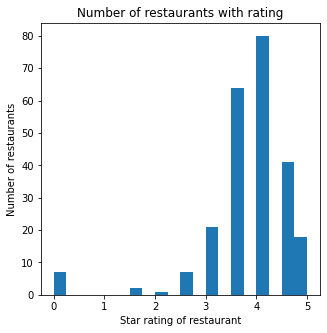

In [8]:
#plot histogram : number of restaurants with a specific rating :
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(figsize =(5, 5))
plt.hist(restaurants_df_drop_col_remove_dups['star_rating'],bins = 20)
plt.xlabel('Star rating of restaurant',fontsize=10)
plt.ylabel('Number of restaurants',fontsize=10)
plt.title('Number of restaurants with rating',fontsize=12)
plt.show();

In [ ]:
'''
this histogram tells us: approximate
there are 7 restaurantst with rating < 1.0 
there are 2 restaurantst with rating between 1.0 and 2.0
there are 7 restaurantst with rating between 2.0 and 3.0
there are 64 restaurantst with rating 3.0 and 4.0
there are 80 restaurantst with rating 4.0 and 5.0
'''


In [161]:
#restaurants_df_drop_col_remove_dups[restaurants_df_drop_col_remove_dups['star_rating'] < 1.0]


In [162]:
#restaurants_df_drop_col_remove_dups['star_rating'].unique()

In [156]:
b#restaurants_df_drop_col_remove_dups[restaurants_df_drop_col_remove_dups['star_rating'] == 4.5]

In [163]:
#restaurants_df_drop_col_remove_dups[(restaurants_df_drop_col_remove_dups['star_rating'] > 1.0) & (restaurants_df_drop_col_remove_dups['star_rating'] < 2.0)]


In [164]:
#restaurants_df_drop_col_remove_dups[(restaurants_df_drop_col_remove_dups['star_rating'] > 2.0) & (restaurants_df_drop_col_remove_dups['star_rating'] < 3.0)]


In [165]:
#restaurants_df_drop_col_remove_dups[(restaurants_df_drop_col_remove_dups['star_rating'] > 3.0) & (restaurants_df_drop_col_remove_dups['star_rating'] < 4.0)]


In [1]:
#restaurants_df_drop_col_remove_dups.head()

In [169]:
#restaurants_df_drop_col_remove_dups['restaurant_cuisines'].value_counts()

In [9]:
#Top Areas with most Indian restaurants :
a_m_r = restaurants_df_drop_col_remove_dups['restaurant_area'].value_counts().head()
a_m_r

Scarborough                      29
Downtown Core                    12
Etobicoke                        10
Mount Pleasant and Davisville     9
Parkdale                          9
Name: restaurant_area, dtype: int64

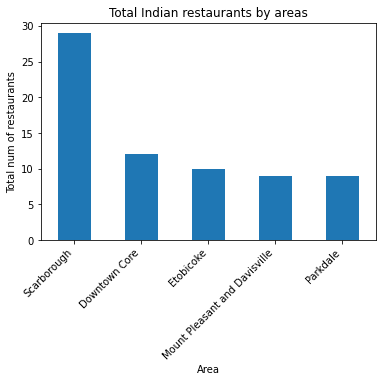

In [10]:
#areas_w_most_ind_rests = restaurants_df_drop_col_remove_dups['restaurant_area'].value_counts().head()
a_m_r.plot(kind='bar',title = 'Total Indian restaurants by areas')
plt.xlabel('Area')
plt.ylabel('Total num of restaurants')
plt.xticks(rotation=45, ha='right');

In [11]:
areas_w_highly_rated_rests = restaurants_df_drop_col_remove_dups[(restaurants_df_drop_col_remove_dups['star_rating'] >= 4.0) & (restaurants_df_drop_col_remove_dups['star_rating'] <= 5.0)]['restaurant_area']
#areas_w_highly_rated_rests


In [12]:
#Areas with highly rated (between 4 and 5) restaurants
a_h_r = areas_w_highly_rated_rests.value_counts().head()
a_h_r

Scarborough                      17
Parkdale                          8
Etobicoke                         6
Mount Pleasant and Davisville     5
Entertainment District            4
Name: restaurant_area, dtype: int64

In [200]:
type(a_h_r)

pandas.core.series.Series

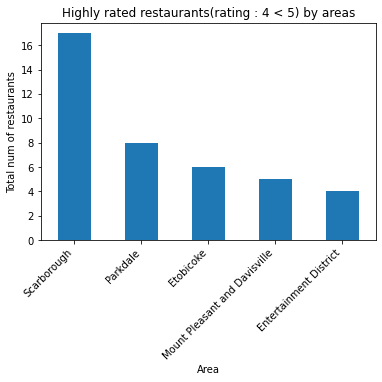

In [13]:

a_h_r.plot(kind='bar',title = 'Highly rated restaurants(rating : 4 < 5) by areas')
plt.xlabel('Area')
plt.ylabel('Total num of restaurants')
plt.xticks(rotation=45, ha='right');

In [15]:
#find percentage : highly rated restaurants/total number of areas 
probability = (a_h_r.div(a_m_r))*100
probability.sort_values(ascending = False)

Parkdale                         88.888889
Etobicoke                        60.000000
Scarborough                      58.620690
Mount Pleasant and Davisville    55.555556
Downtown Core                          NaN
Entertainment District                 NaN
Name: restaurant_area, dtype: float64

In [204]:
restaurants_df_drop_col_remove_dups.head()

,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
2,Aanch,4.5,170,$$,['Indian'],Entertainment District,['Delivery']
3,The Bombay,5.0,4,NaN,"['Indian', 'Hakka', 'Venues & Event Spaces']",Queen Street West,"['Outdoor dining', 'Delivery', 'Takeout']"
4,Roti Mahal Indian Cuisine,4.5,9,NaN,['Indian'],Alexandra Park,"['Outdoor dining', 'Delivery', 'Takeout']"
5,Thindi,4.5,16,NaN,['Indian'],Ryerson,"['Delivery', 'Takeout']"
6,Bindia Indian Bistro,4.0,188,$$,['Indian'],St. Lawrence,"['Outdoor dining', 'Delivery', 'Takeout']"


In [208]:
#most restaurants are medium range priced
restaurants_df_drop_col_remove_dups['restaurant_price'].value_counts()

$$      76
$       28
$$$      4
$$$$     1
Name: restaurant_price, dtype: int64

In [217]:
#restaurant delivery options : 
mode_dict = {}
delivery_count = 0
takeout_count = 0
deal_count = 0
proof_vac_count = 0
out_din_count = 0

rest_del_opt = restaurants_df_drop_col_remove_dups['restaurant_delivery_options']
for mode in rest_del_opt :
    if 'Delivery' in mode :
        delivery_count += 1
        
    if 'Takeout' in mode :
        takeout_count += 1 
        
    if 'Deal' in mode :
        deal_count += 1
        
    if 'Proof of vaccination required' in mode :
        proof_vac_count += 1
    
    if 'Outdoor dining' in mode :
        out_din_count += 1
        

mode_dict = {
    'Delivery': delivery_count,
    'Takeout' : takeout_count,
    'Deal':deal_count ,
    'Vaccination_proof': proof_vac_count,
    'Outdoor_dining':out_din_count
}

print(mode_dict)

{'Delivery': 127, 'Takeout': 114, 'Deal': 3, 'Vaccination_proof': 2, 'Outdoor_dining': 42}


In [48]:
restaurants_df_drop_col_remove_dups.head()

,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
2,Aanch,4.5,170,$$,['Indian'],Entertainment District,['Delivery']
3,The Bombay,5.0,4,NaN,"['Indian', 'Hakka', 'Venues & Event Spaces']",Queen Street West,"['Outdoor dining', 'Delivery', 'Takeout']"
4,Roti Mahal Indian Cuisine,4.5,9,NaN,['Indian'],Alexandra Park,"['Outdoor dining', 'Delivery', 'Takeout']"
5,Thindi,4.5,16,NaN,['Indian'],Ryerson,"['Delivery', 'Takeout']"
6,Bindia Indian Bistro,4.0,188,$$,['Indian'],St. Lawrence,"['Outdoor dining', 'Delivery', 'Takeout']"


In [59]:
del_mode_rating = restaurants_df_drop_col_remove_dups.iloc[:,[6,1]]
del_mode_rating

,restaurant_delivery_options,star_rating
2,['Delivery'],4.5
3,"['Outdoor dining', 'Delivery', 'Takeout']",5.0
4,"['Outdoor dining', 'Delivery', 'Takeout']",4.5
5,"['Delivery', 'Takeout']",4.5
6,"['Outdoor dining', 'Delivery', 'Takeout']",4.0
7,[],4.0
8,"['Outdoor dining', 'Delivery', 'Takeout']",5.0
9,"['Delivery', 'Takeout']",4.5
10,"['Outdoor dining', 'Delivery', 'Takeout']",5.0
11,"['Outdoor dining', 'Delivery', 'Takeout']",4.0


In [71]:
#Does offering delivery affect rating ? Analysis says NO.
del_mode_rating.value_counts().head(10)

restaurant_delivery_options                star_rating
[]                                         4.0            29
                                           3.5            26
['Delivery', 'Takeout']                    4.0            24
                                           3.5            16
['Outdoor dining', 'Delivery', 'Takeout']  4.0            13
[]                                         4.5            11
                                           3.0            11
['Delivery', 'Takeout']                    4.5            10
['Delivery']                               3.5             9
                                           4.5             9
dtype: int64

In [243]:
#5 star restaurants with most reviews :
x = restaurants_df_drop_col_remove_dups[restaurants_df_drop_col_remove_dups['star_rating'] == 5.0]
#x['restaurant_reviews_count'].sort_values(ascending = False)
rest_5_m_rev = x[['rest_name','restaurant_reviews_count']].sort_values(by = ['restaurant_reviews_count'],ascending=False)

rest_5_m_rev.head()


,rest_name,restaurant_reviews_count
83,TVX,22
10,Pukka Pukka,11
8,Indian Desire,9
31,Maezo Indian Cuisine,9
61,Tadka - Sizzling Indian Spices,9


In [247]:
#type(rest_5_m_rev.head())

In [61]:
#restaurants_df_drop_col_remove_dups.head()

In [250]:
#Top 10 indian restaurants in Toronto, number of reviews, then number of stars
restaurants_df_drop_col_remove_dups.sort_values(['restaurant_reviews_count','star_rating'], ascending = (False,False)).head(10)

,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
72,Byblos,4.5,814,$$$,"['Mediterranean', 'Middle Eastern']",Entertainment District,"['Delivery', 'Takeout']"
185,Maha’s,4.0,522,$$,"['Egyptian', 'Vegan', 'Sandwiches']",Leslieville,"['Outdoor dining', 'Takeout']"
28,Lahore Tikka House,3.5,508,$$,"['Halal', 'Pakistani']",Leslieville,"['Outdoor dining', 'Delivery', 'Takeout']"
17,Banjara Indian Cuisine,3.5,417,$$,['Indian'],Christie Pits,[]
255,Fresh on Spadina,4.0,406,$$,"['Vegan', 'Juice Bars & Smoothies', 'Burgers']",Entertainment District,"['Proof of vaccination required', 'Takeout']"
21,Little India Restaurant,3.5,390,$$,"['Indian', 'Buffets']",Queen Street West,"['Delivery', 'Takeout']"
292,The Halal Guys,3.0,257,$$,"['Middle Eastern', 'Halal']",Church-Wellesley Village,"['Delivery', 'Takeout']"
57,Tibet Kitchen,4.5,245,$$,['Himalayan/Nepalese'],Parkdale,['Delivery']
36,Aroma Fine Indian Cuisine,3.5,210,$$,['Indian'],Entertainment District,['Delivery']
15,Indian Roti House,4.0,208,$$,['Indian'],Harbourfront,"['Delivery', 'Takeout']"


In [42]:
#Any correlation between cuisines offered and rating ? No
#rest_star_rat = restaurants_df_drop_col_remove_dups.iloc[:,[4,1]]
#rest_star_rat

In [43]:
#Any correlation between cuisines offered and reviews count ? 
# = restaurants_df_drop_col_remove_dups.iloc[:,[4,2]]
#rest_revw_cnt

In [44]:

#rest_revw_cnt.value_counts()

In [62]:
#type(rest_revw_cnt)

In [45]:
pd.set_option('display.max_rows',None)
#rest_revw_cnt.value_counts()

In [46]:
#x = rest_revw_cnt.value_counts()
#type(x)
#x

pandas.core.series.Series

In [10]:
#restaurants_df_drop_col_remove_dups.head()

In [10]:
restaurants_df_drop_col_remove_dups['restaurant_price']

2       $$
3      NaN
4      NaN
5      NaN
6       $$
      ... 
306    NaN
307    NaN
308     $$
309     $$
310      $
Name: restaurant_price, Length: 241, dtype: object

In [19]:
restaurants_df_drop_col_remove_dups['restaurant_price'].value_counts()


$$      76
$       28
$$$      4
$$$$     1
Name: restaurant_price, dtype: int64

In [9]:
restaurants_df_drop_col_remove_dups.head()

,rest_name,star_rating,restaurant_reviews_count,restaurant_price,restaurant_cuisines,restaurant_area,restaurant_delivery_options
2,Aanch,4.5,170,$$,['Indian'],Entertainment District,['Delivery']
3,The Bombay,5.0,4,NaN,"['Indian', 'Hakka', 'Venues & Event Spaces']",Queen Street West,"['Outdoor dining', 'Delivery', 'Takeout']"
4,Roti Mahal Indian Cuisine,4.5,9,NaN,['Indian'],Alexandra Park,"['Outdoor dining', 'Delivery', 'Takeout']"
5,Thindi,4.5,16,NaN,['Indian'],Ryerson,"['Delivery', 'Takeout']"
6,Bindia Indian Bistro,4.0,188,$$,['Indian'],St. Lawrence,"['Outdoor dining', 'Delivery', 'Takeout']"


In [21]:
restaurants_df_drop_col_remove_dups.iloc[:,[3,1]].value_counts()

restaurant_price  star_rating
$$                4.0            32
                  3.5            24
$                 3.5            12
$$                3.0             9
                  4.5             8
$                 4.0             6
                  4.5             5
$$                2.5             3
$                 2.5             2
                  3.0             2
$$$               4.0             2
$                 1.5             1
$$$               3.5             1
                  4.5             1
$$$$              3.5             1
dtype: int64

In [64]:
#Does price affect rating ? Analysis says no
price_rating = restaurants_df_drop_col_remove_dups.iloc[:,[3,1]]
price_rating

,restaurant_price,star_rating
2,$$,4.5
3,NaN,5.0
4,NaN,4.5
5,NaN,4.5
6,$$,4.0
7,$$,4.0
8,NaN,5.0
9,NaN,4.5
10,NaN,5.0
11,$$,4.0


In [73]:
price_rating.value_counts()

restaurant_price  star_rating
$$                4.0            32
                  3.5            24
$                 3.5            12
$$                3.0             9
                  4.5             8
$                 4.0             6
                  4.5             5
$$                2.5             3
$                 2.5             2
                  3.0             2
$$$               4.0             2
$                 1.5             1
$$$               3.5             1
                  4.5             1
$$$$              3.5             1
dtype: int64

In [ ]:
#most popular business in Toronto - Banjara Indian Cuisine item 17, rating 3.5 and 417 reviews